# <u>Car Price Prediction using Machine Learning


## Import libraries

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [50]:
# importing car data

df = pd.read_csv('dataset/car data.csv')
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [52]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [53]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [54]:
print(df.Fuel_Type.value_counts())
print(df.Transmission.value_counts())
print(df.Seller_Type.value_counts())


Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [55]:
tmp=df.Fuel_Type.value_counts()
tmp.hvplot.bar(title = 'Type of fuel',color='grey' ,invert=1 , flip_xaxis=0, flip_yaxis=1, hover=1 , xlabel='Fuel type' , ylabel='Value' )

:Bars   [index]   (Fuel_Type)

In [56]:
tmp=df.Seller_Type.value_counts()
tmp.hvplot.bar(title = 'Type of seller',color='grey'  ,invert=1 , flip_xaxis=0, flip_yaxis=1, hover=1 , xlabel='Seller type' , ylabel='Value' )

:Bars   [index]   (Seller_Type)

In [57]:
tmp=df.Transmission.value_counts()
tmp.hvplot.bar(title = 'Type of Transmission' ,invert=1 ,color='grey' , flip_xaxis=0, flip_yaxis=1, hover=1 , xlabel='Transmission type' , ylabel='Value' )

:Bars   [index]   (Transmission)

## Encoding the Categorical Data

In [62]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [63]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
44,omni,2012,1.25,2.69,50000,0,0,0,0
171,Hero Passion Pro,2015,0.40,0.55,6700,0,1,0,0
119,Royal Enfield Thunder 500,2013,1.05,1.90,5400,0,1,0,0
85,camry,2006,2.50,23.73,142000,0,1,1,3
73,etios liva,2011,2.65,5.71,43000,0,0,0,0


### Splitting the data and Target Variable from the dataset

In [66]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
Y = df.Selling_Price
X.head(5)

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [65]:
Y.head(5)

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

### Splitting Training and Test data, taking 70% of the data for training and 30% for testing

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=2)

### Model Training
<br>
1. Linear Regression

In [68]:
# loading the linear regression model
lin_reg_model = LinearRegression()

In [69]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Evaluation of the model

In [70]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [71]:
# R squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.9057062673222014


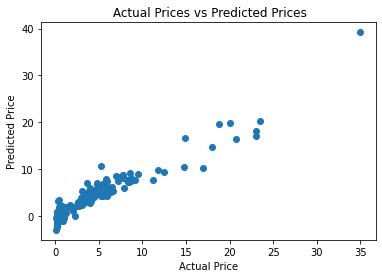

In [74]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [81]:
# prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [82]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8270511876244293


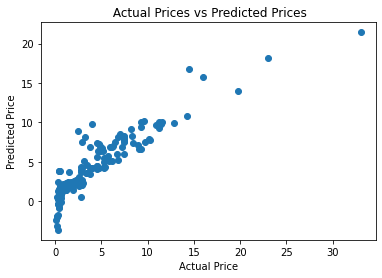

In [83]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()